In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Sephora dataset
data = pd.read_csv("sephora_website_dataset.csv")

# Display basic information about the dataset
print("Dataset Shape:", data.shape)
print("\nColumn Names:")
print(data.columns.tolist())
print("\nFirst few rows:")
data.head()

Dataset Shape: (9168, 21)

Column Names:
['id', 'brand', 'category', 'name', 'size', 'rating', 'number_of_reviews', 'love', 'price', 'value_price', 'URL', 'MarketingFlags', 'MarketingFlags_content', 'options', 'details', 'how_to_use', 'ingredients', 'online_only', 'exclusive', 'limited_edition', 'limited_time_offer']

First few rows:


,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0


In [2]:
# Check for missing values or null values
print(data.isnull().sum())

id                        0
brand                     0
category                  0
name                      0
size                      0
rating                    0
number_of_reviews         0
love                      0
price                     0
value_price               0
URL                       0
MarketingFlags            0
MarketingFlags_content    0
options                   0
details                   0
how_to_use                0
ingredients               0
online_only               0
exclusive                 0
limited_edition           0
limited_time_offer        0
dtype: int64


In [6]:
print(data.category.value_counts())

print(data.category.unique())

category
Perfume                      665
Moisturizers                 451
Face Serums                  384
Value & Gift Sets            378
Face Wash & Cleansers        247
                            ... 
Wellness                       1
High Tech Tools                1
Hair Styling & Treatments      1
Curls & Coils                  1
Lid Shadow Brush               1
Name: count, Length: 143, dtype: int64
['Fragrance' 'Cologne' 'Perfume' 'Body Mist & Hair Mist'
 'Body Lotions & Body Oils' 'Body Sprays & Deodorant' 'Perfume Gift Sets'
 'no category' 'Rollerballs & Travel Size' 'Lip Balm & Treatment'
 'Lotions & Oils' 'Eye Palettes' 'Highlighter' 'Cheek Palettes' 'Lipstick'
 'Face Serums' 'Moisturizers' 'Value & Gift Sets'
 'Eye Creams & Treatments' 'Face Sunscreen' 'Lip Balms & Treatments'
 'Mini Size' 'Face Masks' 'Face Wash & Cleansers'
 'Decollete & Neck Creams' 'Face Oils' 'Hand Cream & Foot Cream'
 'Face Primer' 'Color Correct' 'Mists & Essences' 'Tinted Moisturizer'
 'Concealer'

In [ ]:
# Find potentially ambiguous 'mask' rows not clearly hair-related
viz_df[viz_df["category_clean"].str.contains("mask")][["category", "Category3"]].sample(
    10, random_state=1
)

,category,Category3
4920,Face Masks,Hair Care
2990,Sheet Masks,Hair Care
4942,Sheet Masks,Hair Care
7745,Face Masks,Hair Care
2225,Face Masks,Hair Care
3791,Face Masks,Hair Care
5080,Hair Masks,Hair Care
9011,Eye Masks,Hair Care
8985,Face Masks,Hair Care
2986,Face Masks,Hair Care


## Question 1:Relationship between Price and Ratings by Category

**Analytical question: Which product categories (skincare, makeup, hair care) demonstrate the strongest correlation between customer ratings and average price points?**

Rows in focus set: 4481  | Categories: ['Hair Care', 'Makeup', 'Skincare']


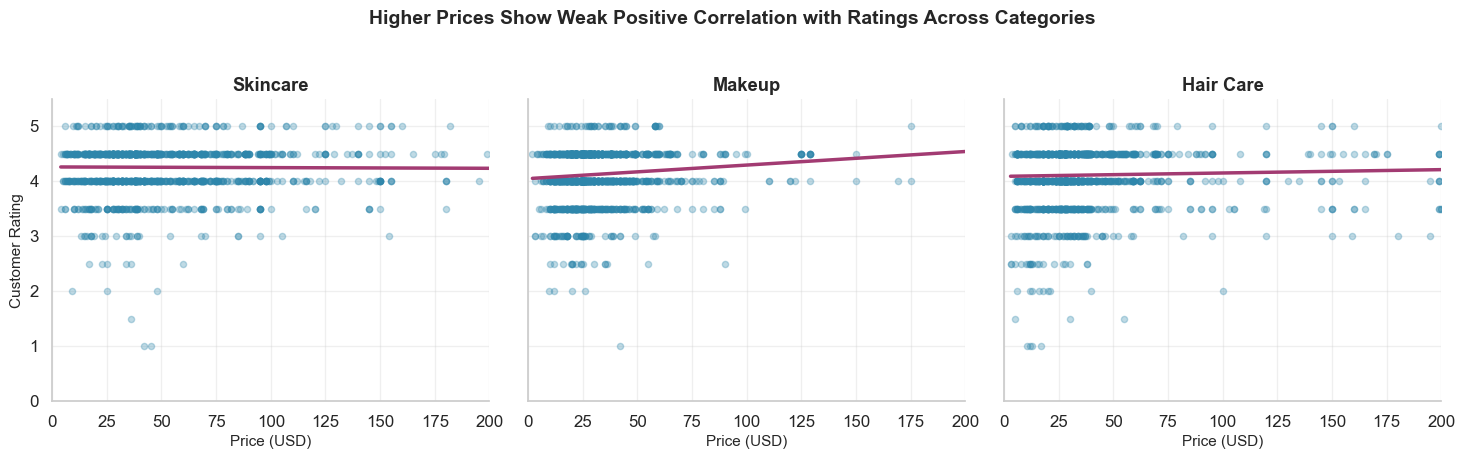

In [3]:
# Clean and map categories to focus on Skincare, Makeup, Hair
# Keep only valid price/rating rows
viz_df = data.copy().assign(
    category_clean=lambda d: d["category"].astype(str).str.lower().str.strip()
)


# Map broad categories using keywords
def map_cat(s):
    s = s or ""
    if any(
        k in s
        for k in [
            "skin",
            "skincare",
            "face wash",
            "moistur",
            "serum",
            "cleanser",
            "toner",
            "spf",
            "sunscreen",
        ]
    ):
        return "Skincare"
    if any(
        k in s
        for k in [
            "makeup",
            "lip",
            "mascara",
            "foundation",
            "concealer",
            "blush",
            "brow",
            "eyeliner",
            "palette",
        ]
    ):
        return "Makeup"
    if any(
        k in s for k in ["hair", "shampoo", "conditioner", "styling", "curl", "mask"]
    ):
        return "Hair Care"
    return "Other"


viz_df["Category3"] = viz_df["category_clean"].apply(map_cat)

viz_df = viz_df.loc[(viz_df["price"] > 0) & (viz_df["rating"] > 0)].copy()
focus = viz_df[viz_df["Category3"].isin(["Skincare", "Makeup", "Hair Care"])]

print(
    f"Rows in focus set: {len(focus)}  | Categories: {sorted(focus['Category3'].unique())}"
)

# VISUALIZATION 1: Faceted scatter with regression lines
# Set clean, professional style
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.1)

# Create faceted plot with consistent color palette
g = sns.lmplot(
    data=focus,
    x="price",
    y="rating",
    col="Category3",
    col_wrap=3,
    col_order=["Skincare", "Makeup", "Hair Care"],
    scatter_kws={"alpha": 0.3, "s": 20, "color": "#2E86AB"},  # Professional blue
    line_kws={"color": "#A23B72", "linewidth": 2.5},  # Contrasting magenta for trend
    height=4.5,
    aspect=1.1,
    robust=True,
    ci=None,  # Remove confidence interval to reduce clutter
)

# Clear, action-oriented title with key takeaway
g.fig.suptitle(
    "Higher Prices Show Weak Positive Correlation with Ratings Across Categories",
    fontsize=14,
    fontweight="bold",
    y=1.02,
)

# Format axis labels for clarity
g.set_axis_labels("Price (USD)", "Customer Rating", fontsize=11)
g.set_titles("{col_name}", fontsize=12, fontweight="bold")

# Set consistent, interpretable axis limits
for ax in g.axes.flat:
    ax.set_xlim(0, 200)  # Focus on main price range
    ax.set_ylim(0, 5.5)  # Rating scale with buffer
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


Correlation Analysis: Price vs. Customer Rating
 Category   Pearson  Spearman  Sample Size
   Makeup  0.117250  0.126202         1667
Hair Care  0.066898  0.107134         1446
 Skincare -0.028174  0.021024         1368

Interpretation: Correlations range from -1 (perfect negative)
to +1 (perfect positive). Values near 0 indicate weak relationship.



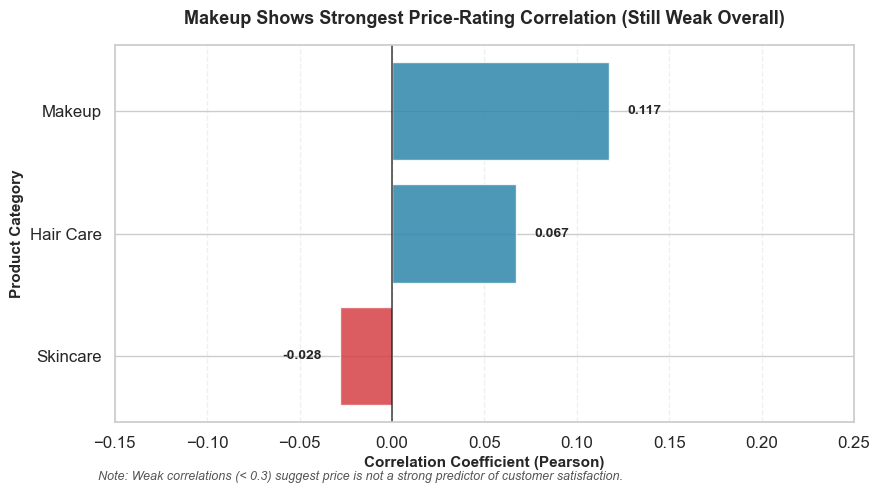


📊 KEY INSIGHT: Makeup has the strongest correlation (0.117),
   but all categories show weak relationships between price and ratings.


In [8]:
# VISUALIZATION 2: Correlation strength by category
from scipy.stats import spearmanr

corr_rows = []
for cat, dfc in focus.groupby("Category3"):
    if dfc[["price", "rating"]].dropna().shape[0] >= 3:
        pearson = dfc[["price", "rating"]].corr().loc["price", "rating"]
        spear, _ = spearmanr(dfc["price"], dfc["rating"])
        corr_rows.append(
            {
                "Category": cat,
                "Pearson": pearson,
                "Spearman": spear,
                "Sample Size": len(dfc),
            }
        )

corr_df = pd.DataFrame(corr_rows).sort_values("Pearson", ascending=False)

# Display correlation table for reference
print("\nCorrelation Analysis: Price vs. Customer Rating")
print("=" * 60)
print(corr_df.to_string(index=False))
print("=" * 60)
print("\nInterpretation: Correlations range from -1 (perfect negative)")
print("to +1 (perfect positive). Values near 0 indicate weak relationship.\n")

# Create clean, executive-friendly bar chart
fig, ax = plt.subplots(figsize=(9, 5))

# Use only Pearson for simplicity (reduce cognitive load)
# Sort by correlation strength for easy comparison
corr_sorted = corr_df.sort_values("Pearson", ascending=True)

# Color code: positive = blue, negative = red
colors = ["#2E86AB" if x >= 0 else "#D64045" for x in corr_sorted["Pearson"]]

bars = ax.barh(
    corr_sorted["Category"], corr_sorted["Pearson"], color=colors, alpha=0.85
)

# Add value labels on bars for precision
for i, (cat, val) in enumerate(zip(corr_sorted["Category"], corr_sorted["Pearson"])):
    ax.text(
        val + 0.01 if val >= 0 else val - 0.01,
        i,
        f"{val:.3f}",
        va="center",
        ha="left" if val >= 0 else "right",
        fontsize=10,
        fontweight="bold",
    )

# Reference line at zero
ax.axvline(0, color="black", linewidth=1.2, linestyle="-", alpha=0.7)

# Clear title with takeaway
ax.set_title(
    "Makeup Shows Strongest Price-Rating Correlation (Still Weak Overall)",
    fontsize=13,
    fontweight="bold",
    pad=15,
)

ax.set_xlabel("Correlation Coefficient (Pearson)", fontsize=11, fontweight="bold")
ax.set_ylabel("Product Category", fontsize=11, fontweight="bold")

# Set interpretable x-axis limits
ax.set_xlim(-0.15, 0.25)
ax.grid(axis="x", alpha=0.3, linestyle="--")

# Add interpretation note
fig.text(
    0.12,
    0.02,
    "Note: Weak correlations (< 0.3) suggest price is not a strong predictor of customer satisfaction.",
    fontsize=9,
    style="italic",
    color="#555555",
)

plt.tight_layout()
plt.show()

# Executive summary
best_cat = corr_df.iloc[0]["Category"]
best_corr = corr_df.iloc[0]["Pearson"]
print(f"\n📊 KEY INSIGHT: {best_cat} has the strongest correlation ({best_corr:.3f}),")
print(f"   but all categories show weak relationships between price and ratings.")

# Brand Performance Analysis

**Analytical Question:** What are the top-performing brands by average rating and number of reviews within each category, and how do they compare?

**Business Goal:** Prioritize brands for future marketing campaigns and promotional placements by mapping customer sentiment and engagement.

In [18]:
# Analyze brand performance across all categories
# Focus on brands with substantial presence (min 20 products and 100 total reviews)

brand_perf = (
    data[data["rating"] > 0]
    .groupby("brand")
    .agg(
        {
            "rating": "mean",
            "number_of_reviews": "sum",
            "id": "count",  # number of products
            "price": "mean",
        }
    )
    .rename(columns={"id": "product_count", "price": "avg_price"})
    .query(
        "product_count >= 20 & number_of_reviews >= 100"
    )  # Filter for substantial brands
    .sort_values("number_of_reviews", ascending=False)
)

print(f"Total brands in dataset: {data['brand'].nunique()}")
print(f"Brands with 20+ products & 100+ reviews: {len(brand_perf)}")
print("\nTop 15 by total reviews:")
print(brand_perf.head(15).to_string())

# Select top 7 brands balancing engagement (reviews) and quality (rating)
# Use a composite score: normalize reviews and ratings, then combine
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
brand_perf["reviews_norm"] = scaler.fit_transform(brand_perf[["number_of_reviews"]])
brand_perf["rating_norm"] = scaler.fit_transform(brand_perf[["rating"]])

# Composite score: 60% engagement, 40% quality (prioritize engagement for marketing)
brand_perf["composite_score"] = (0.6 * brand_perf["reviews_norm"]) + (
    0.4 * brand_perf["rating_norm"]
)

top_brands = brand_perf.nlargest(7, "composite_score").index.tolist()

print(f"\n🎯 Selected Top 7 Brands for Analysis:")
print(
    brand_perf.loc[top_brands][
        ["rating", "number_of_reviews", "product_count", "composite_score"]
    ].to_string()
)

Total brands in dataset: 324
Brands with 20+ products & 100+ reviews: 147

Top 15 by total reviews:
                           rating  number_of_reviews  product_count  avg_price
brand                                                                         
SEPHORA COLLECTION       4.108602             121095            465  18.206344
Too Faced                4.076923              88405             78  30.705128
Urban Decay              4.155405              87273             74  27.567568
Benefit Cosmetics        4.094444              87237             90  24.622222
KVD Vegan Beauty         4.142857              86103             70  27.814286
CLINIQUE                 4.196347              85435            219  30.045662
tarte                    4.029586              80230            169  26.035503
Anastasia Beverly Hills  4.316176              76924             68  26.139706
NARS                     4.114035              68949             57  33.947368
bareMinerals             4.1403

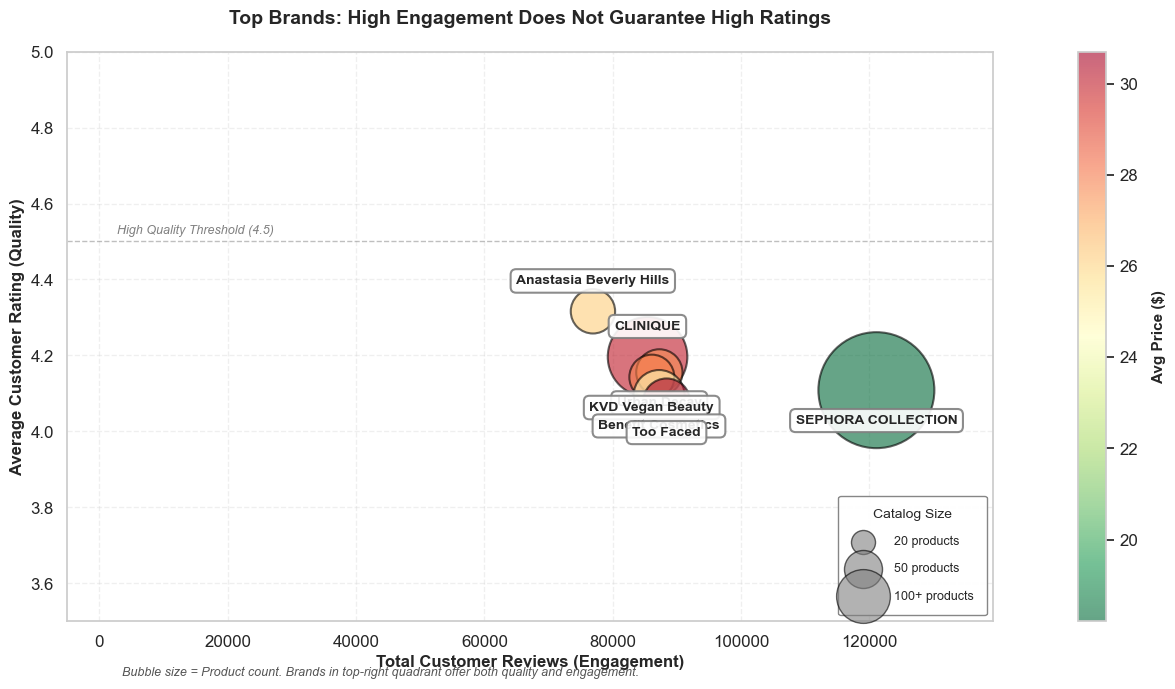


📊 KEY INSIGHTS:
   • Highest Quality: Anastasia Beverly Hills (avg rating 4.32)
   • Highest Engagement: SEPHORA COLLECTION (121,095 reviews)


In [ ]:
# VISUALIZATION 1: Brand Performance - Quality vs Engagement
# Bubble chart: Rating (quality) vs Total Reviews (engagement)

fig, ax = plt.subplots(figsize=(12, 7))

# Prepare data for top 7 brands
plot_data = brand_perf.loc[top_brands].copy()
plot_data["brand_name"] = plot_data.index

# Create bubble chart
# Size represents number of products (catalog breadth)
sizes = plot_data["product_count"] * 15  # Scale for visibility

scatter = ax.scatter(
    plot_data["number_of_reviews"],
    plot_data["rating"],
    s=sizes,
    alpha=0.6,
    c=plot_data["avg_price"],
    cmap="RdYlGn_r",  # Red (high price) to Green (low price)
    edgecolors="black",
    linewidth=1.5,
)

# Add colorbar for price with more space
cbar = plt.colorbar(scatter, ax=ax, pad=0.08, fraction=0.046)
cbar.set_label("Avg Price ($)", fontsize=11, fontweight="bold", labelpad=10)

# Label only selected brands to reduce clutter
desired_brands = {"sephora collection", "anastasia beverly hills"}
texts = []
for idx, row in plot_data.iterrows():
    if str(idx).strip().lower() in desired_brands:
        text = ax.text(
            row["number_of_reviews"],
            row["rating"],
            idx,
            fontsize=10,
            fontweight="bold",
            ha="center",
            va="center",
            zorder=5,
            bbox=dict(
                boxstyle="round,pad=0.4",
                facecolor="white",
                edgecolor="gray",
                alpha=0.9,
                linewidth=1.5,
            ),
        )
        texts.append(text)

# Try to use adjustText if available, otherwise use manual positioning
if texts:
    try:
        from adjustText import adjust_text

        adjust_text(
            texts,
            arrowprops=dict(arrowstyle="->", color="gray", lw=1, alpha=0.7),
            expand_points=(1.5, 1.5),
            expand_text=(1.2, 1.2),
            force_points=(0.6, 0.6),
            force_text=(0.6, 0.6),
            ax=ax,
        )
    except ImportError:
        # Manual offset if adjustText not available
        center_x = plot_data["number_of_reviews"].mean()
        center_y = plot_data["rating"].mean()
        for text in texts:
            x, y = text.get_position()
            x_offset = 20 if x > center_x else -20
            y_offset = 0.08 if y > center_y else -0.08
            text.set_position((x + x_offset, y + y_offset))

# Title with clear takeaway
ax.set_title(
    "Top Brands: High Engagement Does Not Guarantee High Ratings",
    fontsize=14,
    fontweight="bold",
    pad=20,
)

# Axis labels
ax.set_xlabel("Total Customer Reviews (Engagement)", fontsize=12, fontweight="bold")
ax.set_ylabel("Average Customer Rating (Quality)", fontsize=12, fontweight="bold")

# Set interpretable scales with more room on right for labels
ax.set_ylim(3.5, 5.0)
ax.set_xlim(-5000, plot_data["number_of_reviews"].max() * 1.15)

# Add grid for easier reading
ax.grid(alpha=0.3, linestyle="--")

# Add reference lines
ax.axhline(4.5, color="gray", linestyle="--", alpha=0.5, linewidth=1)
ax.text(
    ax.get_xlim()[1] * 0.02,
    4.52,
    "High Quality Threshold (4.5)",
    fontsize=9,
    style="italic",
    color="gray",
)

# Add improved legend for bubble size with better spacing
legend_sizes = [20, 50, 100]
legend_labels = ["20 products", "50 products", "100 products"]
legend_handles = [
    plt.scatter([], [], s=sz * 15, c="gray", alpha=0.6, edgecolors="black")
    for sz in legend_sizes
]

# Create legend with more spacing
legend = ax.legend(
    legend_handles,
    legend_labels,
    title="Catalog Size",
    loc="lower right",
    frameon=True,
    fontsize=9,
    title_fontsize=10,
    labelspacing=1.2,  # Increase vertical space between items
    borderpad=1,  # Padding inside legend box
    handletextpad=1.5,  # Space between marker and text
)
legend.get_frame().set_alpha(0.95)
legend.get_frame().set_edgecolor("gray")

# Add interpretation note
fig.text(
    0.11,
    0.02,
    "Bubble size = Product count. Brands in top-right quadrant offer both quality and engagement.",
    fontsize=9,
    style="italic",
    color="#555555",
)

plt.tight_layout()
plt.show()

# Print key insight
top_quality = plot_data.nlargest(1, "rating").index[0]
top_engagement = plot_data.nlargest(1, "number_of_reviews").index[0]
print(f"\n📊 KEY INSIGHTS:")
print(
    f"   • Highest Quality: {top_quality} (avg rating {plot_data.loc[top_quality, 'rating']:.2f})"
)
print(
    f"   • Highest Engagement: {top_engagement} ({plot_data.loc[top_engagement, 'number_of_reviews']:,.0f} reviews)"
)

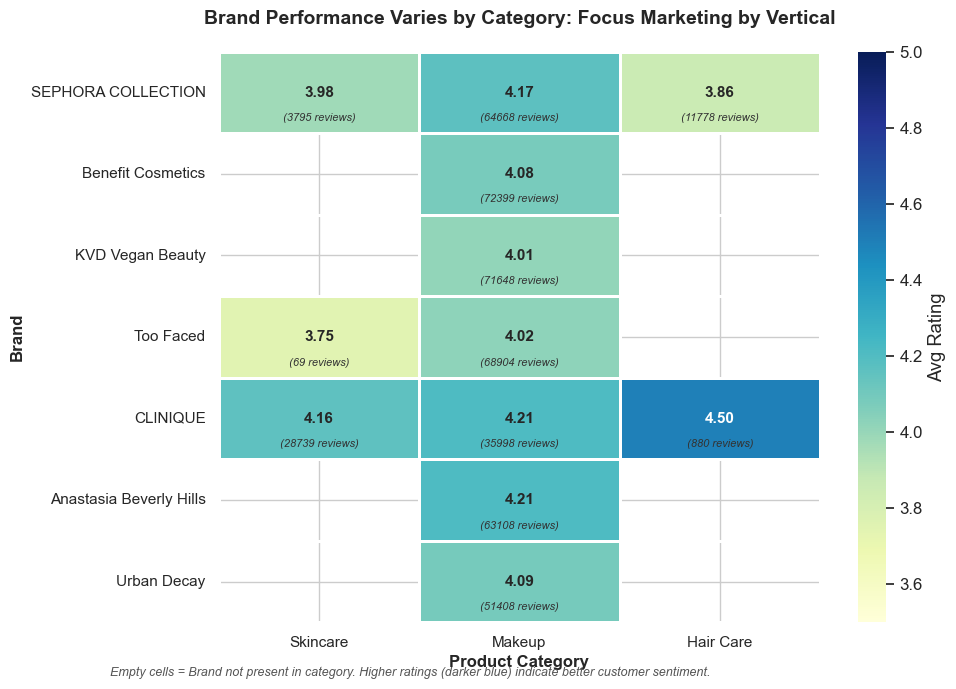


📊 STRATEGIC INSIGHTS:

Category Champions (highest avg rating per category):
   • Skincare: CLINIQUE (4.16 rating, 28739 reviews)
   • Makeup: Anastasia Beverly Hills (4.21 rating, 63108 reviews)
   • Hair Care: CLINIQUE (4.50 rating, 880 reviews)

Cross-Category Leaders (present in all 3 categories):
   • SEPHORA COLLECTION (avg 4.00 across categories)
   • CLINIQUE (avg 4.29 across categories)


In [20]:
# VISUALIZATION 2: Category-Level Brand Performance Heatmap
# Shows how top brands perform across Skincare, Makeup, and Hair Care

# Prepare category-level data for top brands
category_brand_data = (
    viz_df[
        viz_df["brand"].isin(top_brands)
        & viz_df["Category3"].isin(["Skincare", "Makeup", "Hair Care"])
    ]
    .groupby(["brand", "Category3"])
    .agg({"rating": "mean", "number_of_reviews": "sum", "id": "count"})
    .rename(columns={"id": "products"})
    .reset_index()
)

# Create pivot tables for heatmap
rating_pivot = category_brand_data.pivot(
    index="brand", columns="Category3", values="rating"
)
review_pivot = category_brand_data.pivot(
    index="brand", columns="Category3", values="number_of_reviews"
)

# Fill NaN with 0 (brand not present in that category)
rating_pivot = rating_pivot.fillna(0)
review_pivot = review_pivot.fillna(0)

# Reorder columns for consistency
cat_order = ["Skincare", "Makeup", "Hair Care"]
rating_pivot = rating_pivot.reindex(columns=cat_order, fill_value=0)

# Sort brands by total reviews across categories
brand_order = review_pivot.sum(axis=1).sort_values(ascending=False).index
rating_pivot = rating_pivot.loc[brand_order]

# Create figure with custom annotations
fig, ax = plt.subplots(figsize=(10, 7))

# Create heatmap with diverging colormap (white = no presence, blue = high rating)
# Mask zeros to show absence clearly
mask = rating_pivot == 0

sns.heatmap(
    rating_pivot,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",  # Yellow to Green to Blue (low to high ratings)
    vmin=3.5,
    vmax=5.0,
    cbar_kws={"label": "Avg Rating"},
    linewidths=2,
    linecolor="white",
    mask=mask,
    ax=ax,
    annot_kws={"fontsize": 11, "fontweight": "bold"},
)

# Overlay with review counts (show engagement)
for i, brand in enumerate(rating_pivot.index):
    for j, cat in enumerate(rating_pivot.columns):
        review_count = review_pivot.loc[brand, cat]
        if review_count > 0:  # Only annotate if brand has presence
            ax.text(
                j + 0.5,
                i + 0.75,
                f"({int(review_count)} reviews)",
                ha="center",
                va="top",
                fontsize=8,
                style="italic",
                color="#333333",
            )

# Title with clear takeaway
ax.set_title(
    "Brand Performance Varies by Category: Focus Marketing by Vertical",
    fontsize=14,
    fontweight="bold",
    pad=20,
)

# Labels
ax.set_xlabel("Product Category", fontsize=12, fontweight="bold")
ax.set_ylabel("Brand", fontsize=12, fontweight="bold")

# Rotate labels for readability
plt.setp(ax.get_xticklabels(), rotation=0, ha="center", fontsize=11)
plt.setp(ax.get_yticklabels(), rotation=0, fontsize=11)

# Add interpretation note
fig.text(
    0.12,
    0.02,
    "Empty cells = Brand not present in category. Higher ratings (darker blue) indicate better customer sentiment.",
    fontsize=9,
    style="italic",
    color="#555555",
)

plt.tight_layout()
plt.show()

# Print strategic insights
print("\n📊 STRATEGIC INSIGHTS:")
print("\nCategory Champions (highest avg rating per category):")
for cat in cat_order:
    if not rating_pivot[cat].empty and rating_pivot[cat].max() > 0:
        champion = rating_pivot[cat].idxmax()
        rating = rating_pivot.loc[champion, cat]
        reviews = review_pivot.loc[champion, cat]
        print(f"   • {cat}: {champion} ({rating:.2f} rating, {int(reviews)} reviews)")

print("\nCross-Category Leaders (present in all 3 categories):")
cross_cat = rating_pivot[(rating_pivot > 0).sum(axis=1) == 3].index.tolist()
if cross_cat:
    for brand in cross_cat:
        avg_rating = rating_pivot.loc[brand].mean()
        print(f"   • {brand} (avg {avg_rating:.2f} across categories)")
else:
    print("   • No brands present in all three categories")